# Import libraries and data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [30]:
df = pd.read_csv('104_IT_jobs.csv')

In [31]:
df.head(1)

,job_item_name,job_item_comapny,job_item_area,job_item_experience,job_item_degree,job_item_salary,job_item_description
0,Senior Embedded Software Engineer -觸控優先,邁新科技有限公司,新北市林口區,經歷不拘,專科,"月薪100,000~190,000元",We are looking forward to building a team of S...


# Analysis

## Helper functions

In [32]:
def extract_number(x):
    """ Extract the number from a string
    """
    x = x.replace(',','')
    return re.findall(r'\d+', x)

def extract_bottom(x):
    return x[0]

def extract_top(x):
    return x[1]

In [49]:
def to_numeric(x):
    return pd.to_numeric(x)

## Classify the salary into three categories

In [33]:
df_annual_sal = df[df['job_item_salary'].str.contains('年薪')]
df_month_sal = df[df['job_item_salary'].str.contains('月薪')]
df_negotiate = df[df['job_item_salary'].str.contains('面議')]

- It seems in the IT field, most of the jobs are negotiable, but opaque.
- roughly 37% of the jobs provide the salary information, and mostly the monthly paid.

In [34]:
len(df_annual_sal)/len(df), len(df_month_sal)/len(df), len(df_negotiate)/len(df)

(0.019939577039274924, 0.3619335347432024, 0.6114803625377644)

In [35]:
x = extract_number('月薪100,000~190,000元')
type(x)

list

### Get the bottom salary from the monthly salary group
- There is not top salary in some of the jobs.

In [46]:
df_month_sal['sal_list'] = df_month_sal['job_item_salary'].map((extract_number))

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/32509577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_sal['sal_list'] = df_month_sal['job_item_salary'].map((extract_number))


In [48]:
# extract the data from job_item_salary column
df_month_sal['bottom_sal'] = df_month_sal['sal_list'].map((extract_bottom))

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/2085977989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_sal['bottom_sal'] = df_month_sal['sal_list'].map((extract_bottom))


In [42]:
df_month_sal['bottom_sal'].head(1)

0    100000
Name: bottom_sal, dtype: object

In [50]:
df_month_sal['bottom_sal'] = df_month_sal['bottom_sal'].map(to_numeric)

C:\Users\alex0\AppData\Local\Temp/ipykernel_4532/1394088323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_sal['bottom_sal'] = df_month_sal['bottom_sal'].map(to_numeric)


<AxesSubplot:ylabel='Frequency'>

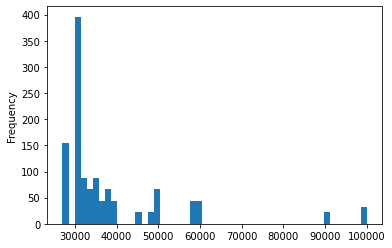

In [51]:
df_month_sal['bottom_sal'].plot(kind='hist', bins=50)